In [1]:
import pandas as pd
import seaborn as sb

In [2]:
def get_df_info(df, include_unique_values=False):
    col_name_list = list(df.columns)
    col_type_list = [type(cell) for cell in df.iloc[0, :]]
    col_null_count_list = [df[col].isnull().sum() for col in col_name_list]
    col_unique_count_list = [df[col].nunique() for col in col_name_list]
    col_mem_usage_list = [df[col].memory_usage(deep=True) for col in col_name_list]
    total_memory_usage = sum(col_mem_usage_list) / 1048576
    if include_unique_values:
        col_unique_list = [df[col].unique() for col in col_name_list]
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                                'null_count': col_null_count_list, 'nunique': col_unique_count_list, 
                                'unique_values': col_unique_list})
    else:
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                        'null_count': col_null_count_list, 'nunique': col_unique_count_list})
    return df_info, total_memory_usage

## Task 6: EDA for 'pokemon' dataset

In [3]:
df_pokemon_raw_data = pd.read_csv('../data/Pokemon.csv', encoding='latin1')

### Text EDA

In [4]:
df_pokemon_raw_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [5]:
df_pokemon_raw_data_info, df_pokemon_raw_data_mem = get_df_info(df_pokemon_raw_data, include_unique_values=True)
print('{} has {} row and {} cols, uses approx. {:.2f} MB'.format('df_pokemon_raw_data', df_pokemon_raw_data.shape[0],
                                                                 df_pokemon_raw_data.shape[1], df_pokemon_raw_data_mem))
df_pokemon_raw_data_info

df_pokemon_raw_data has 151 row and 13 cols, uses approx. 0.04 MB


,column_name,type,null_count,nunique,unique_values
0,#,<class 'numpy.int64'>,0,151,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Name,<class 'str'>,0,151,"[Bulbasaur, Ivysaur, Venusaur, Charmander, Cha..."
2,Type 1,<class 'str'>,0,15,"[Grass, Fire, Water, Bug, Normal, Poison, Elec..."
3,Type 2,<class 'str'>,84,11,"[Poison, nan, Flying, Ground, Fairy, Grass, Fi..."
4,Total,<class 'numpy.int64'>,0,74,"[318, 405, 525, 309, 534, 314, 530, 195, 205, ..."
5,HP,<class 'numpy.int64'>,0,42,"[45, 60, 80, 39, 58, 78, 44, 59, 79, 50, 40, 6..."
6,Attack,<class 'numpy.int64'>,0,46,"[49, 62, 82, 52, 64, 84, 48, 63, 83, 30, 20, 4..."
7,Defense,<class 'numpy.int64'>,0,44,"[49, 63, 83, 43, 58, 78, 65, 80, 100, 35, 55, ..."
8,Sp. Atk,<class 'numpy.int64'>,0,34,"[65, 80, 100, 60, 109, 50, 85, 20, 25, 90, 45,..."
9,Sp. Def,<class 'numpy.int64'>,0,29,"[65, 80, 100, 50, 85, 64, 105, 20, 25, 35, 70,..."


### Viz EDA

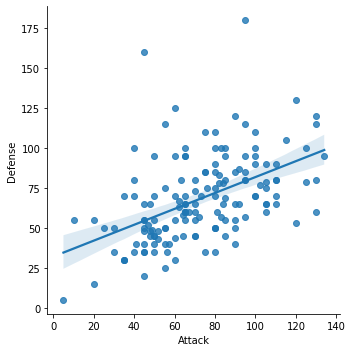

In [6]:
sb.lmplot(x='Attack', y='Defense', data=df_pokemon_raw_data)

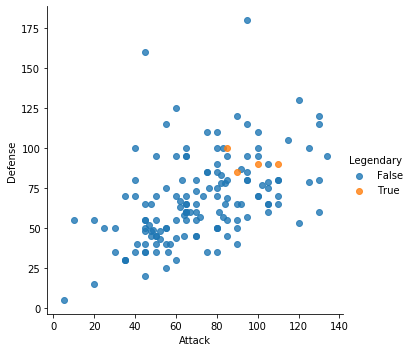

In [7]:
sb.lmplot(x='Attack', y='Defense', data=df_pokemon_raw_data, fit_reg=False, hue='Legendary')

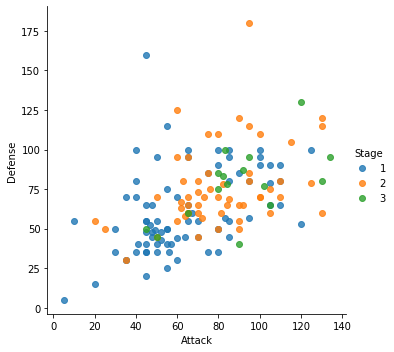

In [8]:
sb.lmplot(x='Attack', y='Defense', data=df_pokemon_raw_data, fit_reg=False, hue='Stage')

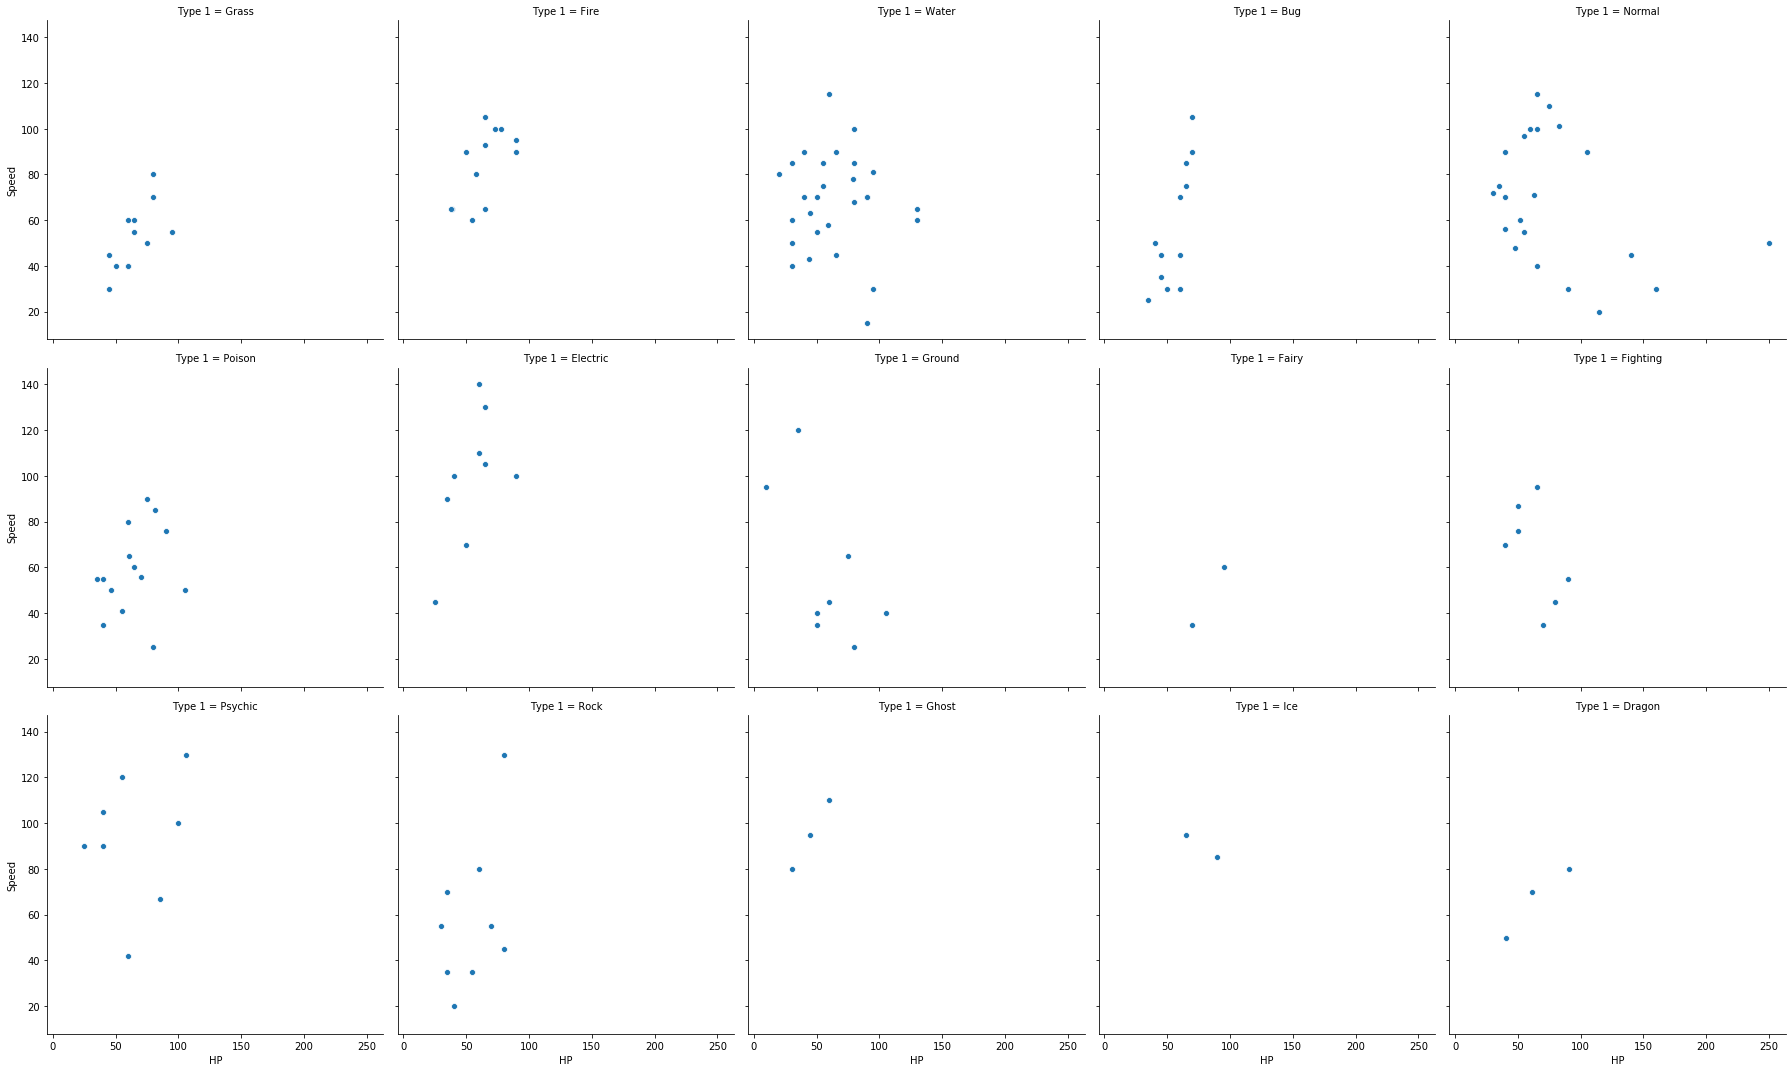

In [9]:
sb.relplot(x='HP', y='Speed', data=df_pokemon_raw_data, col='Type 1', col_wrap=5)

### Boxplot to check:

### - min and max (whisker boundaries)
### - 1st, 2nd and 3rd quartiles (box boundaries)
### - outliers (isolated diamonds)

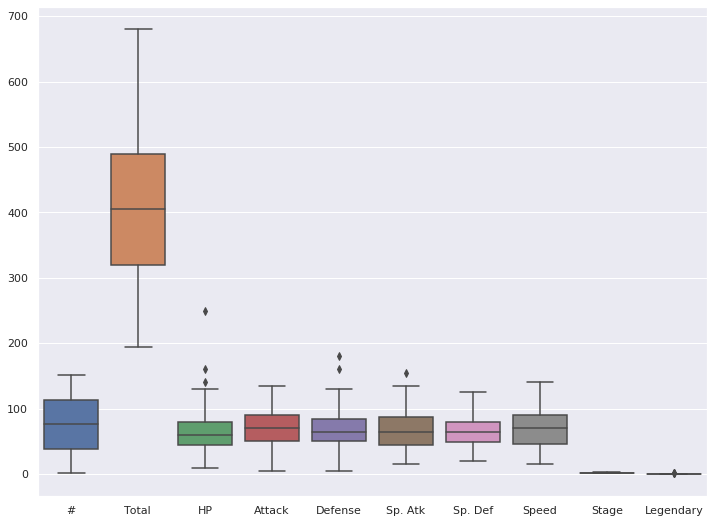

In [10]:
sb.set(rc={'figure.figsize': (12, 9)})
sb.boxplot(data=df_pokemon_raw_data)

In [11]:
df_pokemon_raw_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.000000,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,43.734045,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,1.000000,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,38.500000,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,76.000000,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,113.500000,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,151.000000,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


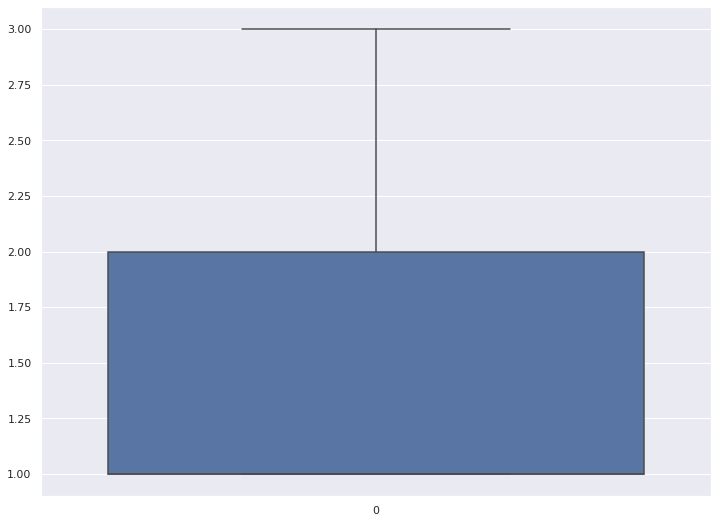

In [12]:
sb.boxplot(data=df_pokemon_raw_data.Stage)

### Stripplot shows data points with distribution and density, useful for comparing variables

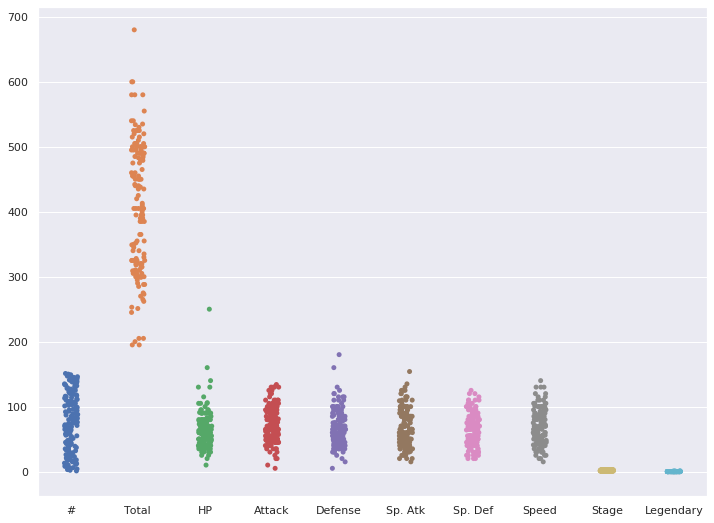

In [13]:
sb.stripplot(data=df_pokemon_raw_data)

In [14]:
df_pokemon_raw_data.Total.value_counts()[:10]

490    7
405    7
500    7
325    6
525    5
455    5
300    5
320    5
495    4
395    4
Name: Total, dtype: int64